/tmp/ipykernel_3688247/535534215.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Gender", y="UniqueCitingAuthors", showfliers=False, palette=palette_Emma)


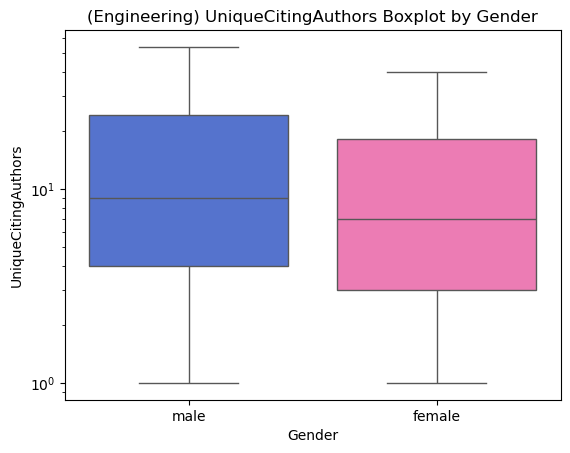

Summary Statistics of Unique Citing Papers by Gender (Engineering)
            count       mean         std  min  25%  50%   75%      max
Gender                                                                
female   432355.0  22.931225   80.682285  1.0  3.0  7.0  18.0  10223.0
male    3159135.0  30.171884  117.667035  1.0  4.0  9.0  24.0  28594.0


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Engineering_unique_citing_authors.csv")

df_filtered = df[df["UniqueCitingAuthors"] > 1e-6]
df_filtered = df_filtered[df_filtered["Gender"] != "unknown"]


palette_Emma = {
    "male": "royalblue",
    "female": "hotpink"
}


sns.boxplot(data=df_filtered, x="Gender", y="UniqueCitingAuthors", showfliers=False, palette=palette_Emma)
plt.yscale('log')
plt.title("(Engineering) UniqueCitingAuthors Boxplot by Gender")
plt.show()

#print(df.groupby("Gender")["UniqueCitingAuthors"].describe())

print("Summary Statistics of Unique Citing Papers by Gender (Engineering)")
print(
    df[df["Gender"].isin(["male", "female"])]
    .groupby("Gender")["UniqueCitingAuthors"]
    .describe()
)

In [3]:
from scipy.stats import mannwhitneyu

male = df[df["Gender"] == "male"]["UniqueCitingAuthors"]
female = df[df["Gender"] == "female"]["UniqueCitingAuthors"]

stat, p = mannwhitneyu(male, female, alternative="two-sided")
print(f"Mann–Whitney U test: U={stat}, p={p}")


Mann–Whitney U test: U=744024233834.0, p=0.0


In [4]:
top_10_percent = df[df["UniqueCitingAuthors"] > df["UniqueCitingAuthors"].quantile(0.9)]
top_gender_dist = top_10_percent["Gender"].value_counts(normalize=True)
print(top_10_percent)
print(top_gender_dist)

           AuthorId  UniqueCitingAuthors   Gender  log_UniqueCitingAuthors
0        2030979222                   76  unknown                 1.886491
6        2103588016                  294     male                 2.469822
9        1985944754                  126  unknown                 2.103804
17       1995584767                  105     male                 2.025306
27       2025220245                   75  unknown                 1.880814
...             ...                  ...      ...                      ...
5798223  2109852801                  100   female                 2.004321
5798233   693681954                  483  unknown                 2.684845
5798237  2201239978                  145   female                 2.164353
5798242  2135807102                  161     male                 2.209515
5798245  3071815911                   55  unknown                 1.748188

[570755 rows x 4 columns]
Gender
male       0.621780
unknown    0.314955
female     0.063265
Name: 

In [5]:
overall_dist = df["Gender"].value_counts(normalize=True)
print(overall_dist)


Gender
male       0.544840
unknown    0.380594
female     0.074566
Name: proportion, dtype: float64


In [6]:
import numpy as np

def gini(array):
    array = np.sort(array)
    n = len(array)
    cumulative = np.cumsum(array, dtype=float)
    relative_mean = array.mean()
    gini_index = (2 * np.sum((np.arange(1, n + 1) * array))) / (n * np.sum(array)) - (n + 1) / n
    return gini_index

import pandas as pd
for gender in df["Gender"].unique():
    group = df[df["Gender"] == gender]
    gini_score = gini(group["UniqueCitingAuthors"].values)
    print(f"Gini coefficient for {gender}(UniqueCitingAuthors): {gini_score:.4f}")
overall_gini = gini(df["UniqueCitingAuthors"].values)
print(f"Overall Gini coefficient (UniqueCitingAuthors): {overall_gini:.4f}")

Gini coefficient for unknown(UniqueCitingAuthors): 0.6939
Gini coefficient for male(UniqueCitingAuthors): 0.7307
Gini coefficient for female(UniqueCitingAuthors): 0.7188
Overall Gini coefficient (UniqueCitingAuthors): 0.7197
